In [22]:
import os, sys
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# matplotlib.rc('font', family='AppleGothic')  # MacOS
# matplotlib.rc('font', family='Malgun Gothic')  # Windows
matplotlib.rc('font', family='NanumBarunGothic') # Linux
plt.rcParams['axes.unicode_minus'] = False

Instructions for updating:
non-resource variables are not supported in the long term


In [23]:
def plot_image(image, shape=[28, 28]):
    plt.imshow(image.reshape(shape), cmap="Greys", interpolation="nearest")
    plt.axis("off")
    
def plot_multiple_images(images, n_rows, n_cols, pad=2):
    images = images - images.min()  # 최소값을 0으로 만들어 패딩이 하얗게 보이도록 합니다.
    w,h = images.shape[1:]
    image = np.zeros(((w+pad)*n_rows+pad, (h+pad)*n_cols+pad))
    for y in range(n_rows):
        for x in range(n_cols):
            image[(y*(h+pad)+pad):(y*(h+pad)+pad+h),(x*(w+pad)+pad):(x*(w+pad)+pad+w)] = images[y*n_cols+x]
    plt.imshow(image, cmap="Greys", interpolation="nearest")
    plt.axis("off")

In [32]:
# 3D 데이터셋을 만듦
import numpy.random as rnd

rnd.seed(4)
m = 200
w1, w2 = 0.1, 0.3
noise = 0.1

angles = rnd.rand(m) * 3 * np.pi / 2 - 0.5
data = np.empty((m, 3))
data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * rnd.randn(m) / 2
data[:, 1] = np.sin(angles) * 0.7 + noise * rnd.randn(m) / 2
data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * rnd.randn(m)

In [33]:
data

array([[-1.02592185e+00, -6.03764035e-01, -3.61779903e-01],
       [-4.78796397e-03,  6.76237786e-01,  3.36012274e-01],
       [-1.06729408e+00, -5.66900983e-01, -3.30641113e-01],
       [-8.62849091e-01,  1.34195014e-01,  3.32310710e-02],
       [-7.70945331e-01,  2.48766682e-01, -1.02861880e-01],
       [ 1.06412364e+00,  4.26245815e-01,  3.00885052e-01],
       [-9.65619888e-01, -6.03557812e-01, -2.66196063e-01],
       [ 5.88804093e-01, -3.65103013e-01,  1.09935587e-01],
       [ 1.09173117e+00,  4.34543182e-01,  3.17925292e-01],
       [ 4.49754726e-01,  7.79687003e-01,  1.93815940e-01],
       [-1.02235571e+00, -5.44024678e-02, -8.34171502e-02],
       [ 1.14286245e+00,  3.19490139e-01,  1.46882802e-01],
       [-1.00702813e+00, -2.38331713e-01, -1.50191559e-01],
       [-9.11372244e-01, -5.55093729e-01, -1.01202740e-01],
       [ 1.17844560e+00,  1.71149025e-01,  3.28981558e-01],
       [-3.06034060e-01,  5.47607256e-01,  1.54151621e-01],
       [ 7.81955940e-01, -3.00848690e-01

In [25]:
data.shape

(200, 3)

In [26]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(data[:100])
X_test = scaler.transform(data[100:])

In [37]:
reset_graph()

################
# layer params #
################
n_inputs = 3
n_hidden = 2  # coding units
n_outputs = n_inputs

# autoencoder
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden)
outputs = tf.layers.dense(hidden, n_outputs)

################
# Train params #
################
learning_rate = 0.01
n_iterations = 1000
pca = hidden

# loss
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))  # MSE
# optimizer
train_op = tf.train.AdamOptimizer(learning_rate).minimize(reconstruction_loss)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for iteration in range(n_iterations):
        train_op.run(feed_dict={X: X_train})
    pca_val = pca.eval(feed_dict={X: X_test})

pca val [[ 3.64702493e-01  1.99769592e+00]
 [-3.59711885e-01  1.34138513e+00]
 [-5.37540436e-01  1.99961376e+00]
 [ 1.70781806e-01 -2.60310960e+00]
 [ 6.20444536e-01 -2.38559866e+00]
 [-7.31673479e-01 -1.53834760e-01]
 [ 1.17159057e+00  8.72861624e-01]
 [-5.44634461e-01 -9.37618792e-01]
 [-7.96601772e-01 -3.96134079e-01]
 [ 1.15389206e-01 -2.31303382e+00]
 [-7.49397650e-02  2.09373403e+00]
 [ 1.32314098e+00  2.40405992e-01]
 [-8.30218136e-01  1.00992933e-01]
 [ 1.11945128e+00  1.53763294e+00]
 [-4.01911438e-01 -1.89244032e+00]
 [-7.41418228e-02 -2.49712133e+00]
 [-2.48494759e-01  1.77139795e+00]
 [ 4.01147366e-01 -2.89516044e+00]
 [ 6.69056296e-01  1.91863024e+00]
 [ 5.96788049e-01 -2.54182291e+00]
 [-3.96830231e-01  1.39423847e+00]
 [-3.01972777e-01 -1.87248397e+00]
 [-4.61545348e-01 -1.79671383e+00]
 [ 8.37065935e-01 -2.98364973e+00]
 [ 7.78916359e-01 -3.11367083e+00]
 [ 1.30998909e+00  2.76628822e-01]
 [ 1.43483126e+00 -3.17452811e-02]
 [-6.68300331e-01  8.01940262e-01]
 [ 1.2746180

pca_val.shape : (100, 2)


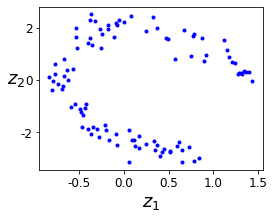

In [38]:
fig = plt.figure(figsize=(4,3))
plt.plot(pca_val[:,0], pca_val[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
print('pca_val.shape :', pca_val.shape)
plt.show()